# 4- Data Preaparation

## Data visualization

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import random

In [ ]:
random_seed = 42
random.seed(random_seed)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','xAttack','level'])

In [ ]:
data_train =pd.read_csv('/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt',header=None,names=Columns)

In [ ]:
data_test =pd.read_csv('/content/drive/MyDrive/NSL-KDD/KDDTest+.txt',header=None,names=Columns)

In [ ]:
print(data_test.duplicated().sum())
print(data_train.duplicated().sum())

0
0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
print(data_test.shape)
print(data_train.shape)
print(data_train.isnull().values.any())
print(data_test.isnull().values.any())

(22544, 43)
(125973, 43)
False
False


In [ ]:
data_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
data_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.000488,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.022084,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
unique_values = pd.concat([data_train.nunique(), data_test.nunique()], axis=1, keys=['Train', 'Test'])

In [ ]:
unique_values

,Train,Test
duration,2981,624
protocol_type,3,3
service,70,64
flag,11,11
src_bytes,3341,1149
dst_bytes,9326,3650
land,2,2
wrong_fragment,3,3
urgent,4,4
hot,28,16


In [ ]:
print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
def change_label(df):
    df.xAttack.replace(['neptune','back', 'land','pod' ,'smurf', 'teardrop','mailbomb','apache2' , 'processtable' ,
                       'udpstorm', 'worm'], 'Dos', inplace=True)
    df.xAttack.replace(['ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'multihop', 'named', 'phf', 'sendmail',
                       'snmpgetattack', 'snmpguess', 'spy', 'warezclient', 'warezmaster', 'xlock', 'xsnoop'], 'R2L', inplace=True)
    df.xAttack.replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 'Probe', inplace=True)
    df.xAttack.replace(['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm'], 'U2R', inplace=True)
    return df

In [ ]:
change_label(data_test)
change_label(data_train)
print(pd.concat([data_train['xAttack'].value_counts(),data_test['xAttack'].value_counts()], axis=1, keys=['Train', 'Test']))

        Train  Test
normal  67343  9711
Dos     45927  7460
Probe   11656  2421
R2L       995  2885
U2R        52    67


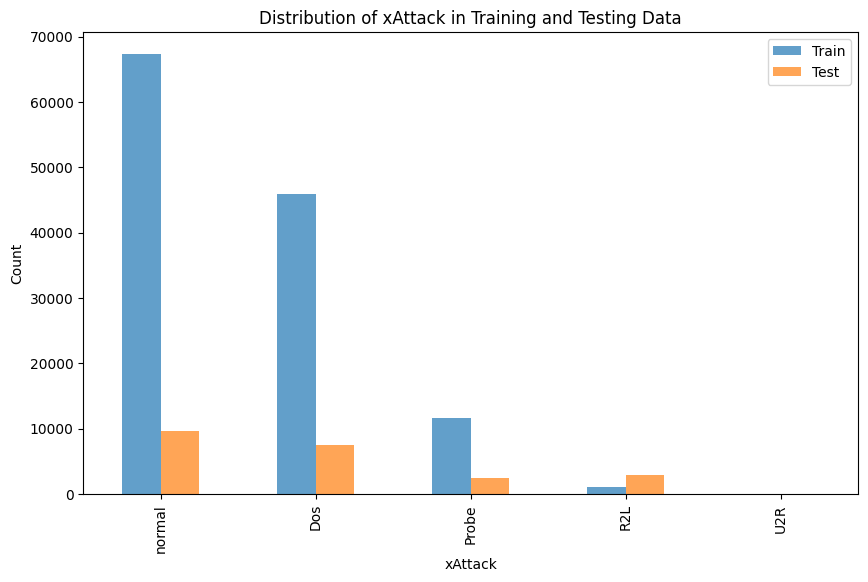

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate the value counts for 'xAttack' in training and testing datasets
concatenated_counts = pd.concat([data_train['xAttack'].value_counts(), data_test['xAttack'].value_counts()], axis=1, keys=['Train', 'Test'])

# Plot the histogram
concatenated_counts.plot(kind='bar', alpha=0.7, figsize=(10, 6))
plt.title('Distribution of xAttack in Training and Testing Data')
plt.xlabel('xAttack')
plt.ylabel('Count')
plt.show()

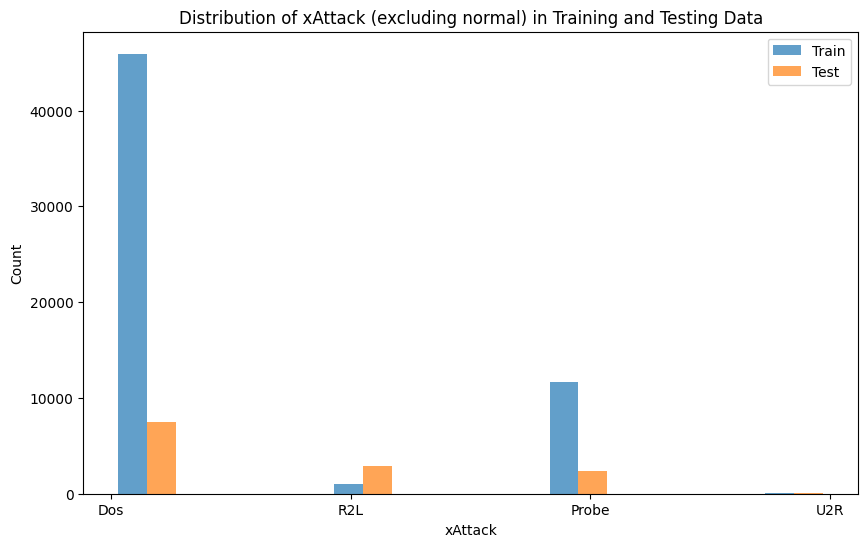

In [ ]:
exclude_value = 'normal'

# Filter the data to exclude rows with 'ExcludeValue' in the 'xAttack' column
filtered_data_train = data_train[data_train['xAttack'] != exclude_value]
filtered_data_test = data_test[data_test['xAttack'] != exclude_value]

# Plot the histogram for the filtered data
plt.figure(figsize=(10, 6))

plt.hist([filtered_data_train['xAttack'], filtered_data_test['xAttack']], alpha=0.7, label=['Train', 'Test'], bins=10)
plt.title(f'Distribution of xAttack (excluding {exclude_value}) in Training and Testing Data')
plt.xlabel('xAttack')
plt.ylabel('Count')
plt.legend()
plt.show()

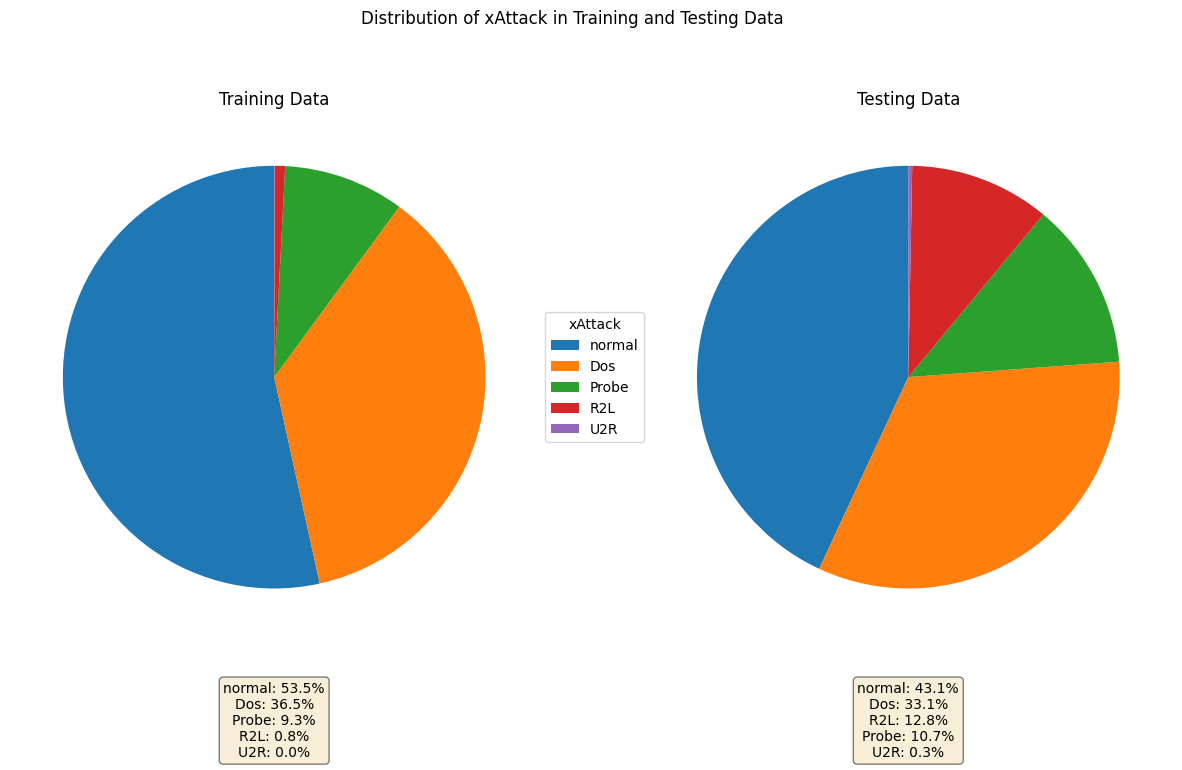

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate value counts for 'xAttack' in both training and testing datasets
train_value_counts = data_train['xAttack'].value_counts()
test_value_counts = data_test['xAttack'].value_counts()

# Plot two pie charts side by side with a legend
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot for data_train without labels but with percentages
wedges_train, _, autotexts_train = axs[0].pie(train_value_counts,
                                              autopct=lambda p: '{:.1f}%'.format(p),
                                              startangle=90)

# Hide labels in data_train
for autotext_train in autotexts_train:
    autotext_train.set_text('')

# Add percentages as annotations under the pie chart
axs[0].text(0.5, -0.15, '\n'.join(['{}: {:.1f}%'.format(label, (count / train_value_counts.sum()) * 100) for label, count in train_value_counts.items()]),
            transform=axs[0].transAxes,
            verticalalignment='center',
            horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axs[0].set_title('Training Data')

# Plot for data_test without labels but with percentages
wedges_test, _, autotexts_test = axs[1].pie(test_value_counts,
                                            autopct=lambda p: '{:.1f}%'.format(p),
                                            startangle=90)

# Hide labels in data_test
for autotext_test in autotexts_test:
    autotext_test.set_text('')

# Add percentages as annotations under the pie chart
axs[1].text(0.5, -0.15, '\n'.join(['{}: {:.1f}%'.format(label, (count / test_value_counts.sum()) * 100) for label, count in test_value_counts.items()]),
            transform=axs[1].transAxes,
            verticalalignment='center',
            horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axs[1].set_title('Testing Data')

# Add legend
axs[0].legend(train_value_counts.index, title='xAttack', loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('Distribution of xAttack in Training and Testing Data', y=1.02)
plt.show()



In [ ]:
X_train=data_train.drop(['xAttack','level'],axis=1)
X_test=data_test.drop(['xAttack','level'],axis=1)

In [ ]:
y_train=data_train[['xAttack']]
y_test=data_test[['xAttack']]

In [ ]:
print(f'features train {X_train.shape}')
print(f'features test {X_test.shape}')
print(f'target train {y_train.shape}')
print(f'target train {y_test.shape}')

features train (125973, 41)
features test (22544, 41)
target train (125973, 1)
target train (22544, 1)


## Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [ ]:
for col in ('protocol_type' ,'service', 'flag' ):
  X_train[col]=X_train[col].astype('category')
  X_test[col]=X_test[col].astype('category')

In [ ]:
print(X_train[['protocol_type' ,'service', 'flag' ]].info())
print(X_test[['protocol_type' ,'service', 'flag' ]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   protocol_type  125973 non-null  category
 1   service        125973 non-null  category
 2   flag           125973 non-null  category
dtypes: category(3)
memory usage: 372.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   protocol_type  22544 non-null  category
 1   service        22544 non-null  category
 2   flag           22544 non-null  category
dtypes: category(3)
memory usage: 69.2 KB
None


In [ ]:
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'category']

In [ ]:
encoder = OneHotEncoder()

In [ ]:
for col in cat_cols:

  encoded_color_train = encoder.fit_transform(X_train[[col]]).toarray()


  # Create new column names for encoded features
  encoded_color_columns = [str(col) + '_'+str(category) for category in encoder.categories_[0]]

  # Add encoded features to the DataFrame
  X_train[encoded_color_columns] = encoded_color_train

In [ ]:
for col in cat_cols:

  encoded_color_test = encoder.fit_transform(X_test[[col]]).toarray()


  # Create new column names for encoded features
  encoded_color_columns = [str(col) + '_'+str(category) for category in encoder.categories_[0]]

  # Add encoded features to the DataFrame
  X_test[encoded_color_columns] = encoded_color_test

In [ ]:
print(f'features train {X_train.shape}')
print(f'features test {X_test.shape}')
print(f'target train {y_train.shape}')
print(f'target train {y_test.shape}')

features train (125973, 125)
features test (22544, 119)
target train (125973, 1)
target train (22544, 1)


In [ ]:
train_service=X_train['service'].tolist()
test_service= X_test['service'].tolist()
difference=list(set(train_service) - set(test_service))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_2784',
 'service_harvest',
 'service_urh_i',
 'service_http_8001',
 'service_aol',
 'service_red_i']

In [ ]:
for col in difference:
    X_test[col] = 0

In [ ]:
X_train.drop(['protocol_type', 'service', 'flag'],axis=1,inplace =True)
X_test.drop(['protocol_type', 'service', 'flag'],axis=1,inplace =True)

In [ ]:
print(f'features train {X_train.shape}')
print(f'features test {X_test.shape}')
print(f'target train {y_train.shape}')
print(f'target train {y_test.shape}')

features train (125973, 122)
features test (22544, 122)
target train (125973, 1)
target train (22544, 1)


## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
normalized_features_train = scaler.fit_transform(X_train)
normalized_features_test = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled=pd.DataFrame(normalized_features_train , columns=X_train.columns)
X_test_scaled=pd.DataFrame(normalized_features_test , columns=X_test.columns)

In [ ]:
print(f'features train {X_train.shape}')
print(f'features test {X_test.shape}')
print(f'target train {y_train.shape}')
print(f'target train {y_test.shape}')

features train (125973, 122)
features test (22544, 122)
target train (125973, 1)
target train (22544, 1)


In [ ]:
X_train_scaled.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
X_test_scaled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_http_2784,service_harvest,service_urh_i,service_http_8001,service_aol,service_red_i
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448141,0.019569,0.0,0.00,1.0,1.0,0.04,0.06,0.00,1.000000,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266145,0.001957,0.0,0.00,1.0,1.0,0.01,0.06,0.00,1.000000,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.525490,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.127202,0.0,0.00,0.0,0.0,1.00,0.00,1.00,0.011765,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000017,0.000000e+00,0.000011,0.0,0

In [ ]:
X_test_scaled.isnull().values.any()

False

In [ ]:
print(f'features train {X_train_scaled.shape}')
print(f'target train {y_train.shape}')
print(f'features test {X_test_scaled.shape}')

print(f'target train {y_test.shape}')

features train (125973, 122)
target train (125973, 1)
features test (22544, 122)
target train (22544, 1)


In [ ]:
train_df=pd.concat([X_train_scaled,y_train],axis=1)

In [ ]:
test_df=pd.concat([X_test_scaled,y_test],axis=1)

In [ ]:
print(train_df.isnull().values.any())
print(test_df.isnull().values.any())

False
False


## Data Set for each type of attacks

In [ ]:
class_column_name = 'xAttack'

# Create DataFrames for 'normal' class in both training and testing sets
normal_train_df = train_df[train_df[class_column_name] == 'normal']
normal_test_df = test_df[test_df[class_column_name] == 'normal']

# Create separate DataFrames for 'normal' combined with each of the remaining classes in both sets
dos_combined_train_df = pd.concat([normal_train_df, train_df[train_df[class_column_name] == 'Dos']])
probe_combined_train_df = pd.concat([normal_train_df, train_df[train_df[class_column_name] == 'Probe']])
r2l_combined_train_df = pd.concat([normal_train_df, train_df[train_df[class_column_name] == 'R2L']])
u2r_combined_train_df = pd.concat([normal_train_df, train_df[train_df[class_column_name] == 'U2R']])

dos_combined_test_df = pd.concat([normal_test_df, test_df[test_df[class_column_name] == 'Dos']])
probe_combined_test_df = pd.concat([normal_test_df, test_df[test_df[class_column_name] == 'Probe']])
r2l_combined_test_df = pd.concat([normal_test_df, test_df[test_df[class_column_name] == 'R2L']])
u2r_combined_test_df = pd.concat([normal_test_df, test_df[test_df[class_column_name] == 'U2R']])

In [ ]:
# For Training Set
# Check for null values in each DataFrame
print("Null values in the Training Set:")
print("Normal Train DataFrame:", normal_train_df.isnull().values.any())
print("DoS Combined Train DataFrame:", dos_combined_train_df.isnull().values.any())
print("Probe Combined Train DataFrame:", probe_combined_train_df.isnull().values.any())
print("R2L Combined Train DataFrame:", r2l_combined_train_df.isnull().values.any())
print("U2R Combined Train DataFrame:", u2r_combined_train_df.isnull().values.any())

# For Testing Set
# Check for null values in each DataFrame
print("\nNull values in the Testing Set:")
print("Normal Test DataFrame:", normal_test_df.isnull().values.any())
print("DoS Combined Test DataFrame:", dos_combined_test_df.isnull().values.any())
print("Probe Combined Test DataFrame:", probe_combined_test_df.isnull().values.any())
print("R2L Combined Test DataFrame:", r2l_combined_test_df.isnull().values.any())
print("U2R Combined Test DataFrame:", u2r_combined_test_df.isnull().values.any())

Null values in the Training Set:
Normal Train DataFrame: False
DoS Combined Train DataFrame: False
Probe Combined Train DataFrame: False
R2L Combined Train DataFrame: False
U2R Combined Train DataFrame: False

Null values in the Testing Set:
Normal Test DataFrame: False
DoS Combined Test DataFrame: False
Probe Combined Test DataFrame: False
R2L Combined Test DataFrame: False
U2R Combined Test DataFrame: False


In [ ]:
# Print the shape of each DataFrame
print("Normal Train DataFrame Shape:", normal_train_df.shape)
print("DoS Combined Train DataFrame Shape:", dos_combined_train_df.shape)
print("Probe Combined Train DataFrame Shape:", probe_combined_train_df.shape)
print("R2L Combined Train DataFrame Shape:", r2l_combined_train_df.shape)
print("U2R Combined Train DataFrame Shape:", u2r_combined_train_df.shape)

print("\nNormal Test DataFrame Shape:", normal_test_df.shape)
print("DoS Combined Test DataFrame Shape:", dos_combined_test_df.shape)
print("Probe Combined Test DataFrame Shape:", probe_combined_test_df.shape)
print("R2L Combined Test DataFrame Shape:", r2l_combined_test_df.shape)
print("U2R Combined Test DataFrame Shape:", u2r_combined_test_df.shape)

Normal Train DataFrame Shape: (67343, 123)
DoS Combined Train DataFrame Shape: (113270, 123)
Probe Combined Train DataFrame Shape: (78999, 123)
R2L Combined Train DataFrame Shape: (68338, 123)
U2R Combined Train DataFrame Shape: (67395, 123)

Normal Test DataFrame Shape: (9711, 123)
DoS Combined Test DataFrame Shape: (17171, 123)
Probe Combined Test DataFrame Shape: (12132, 123)
R2L Combined Test DataFrame Shape: (12596, 123)
U2R Combined Test DataFrame Shape: (9778, 123)


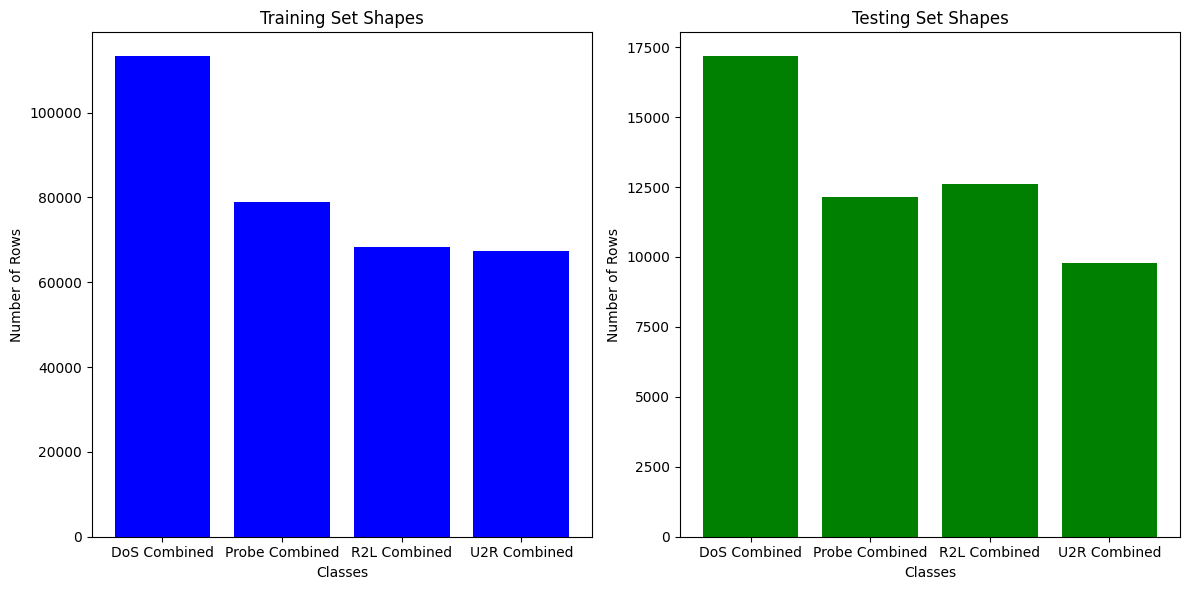

In [ ]:
import matplotlib.pyplot as plt

# Define the shapes for the training and testing DataFrames excluding 'Normal'
train_shapes = [
    dos_combined_train_df.shape[0],
    probe_combined_train_df.shape[0],
    r2l_combined_train_df.shape[0],
    u2r_combined_train_df.shape[0]
]

test_shapes = [
    dos_combined_test_df.shape[0],
    probe_combined_test_df.shape[0],
    r2l_combined_test_df.shape[0],
    u2r_combined_test_df.shape[0]
]

# Define the classes for the bars
classes = ['DoS Combined', 'Probe Combined', 'R2L Combined', 'U2R Combined']

# Plotting the histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(classes, train_shapes, color='blue')
ax1.set_title('Training Set Shapes')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Number of Rows')

ax2.bar(classes, test_shapes, color='green')
ax2.set_title('Testing Set Shapes')
ax2.set_xlabel('Classes')
ax2.set_ylabel('Number of Rows')

plt.tight_layout()
plt.show()


## Features Selections

In [ ]:
def binary_target(df,threshold):

  df['xAttack'] = np.where(df['xAttack'] == threshold, 1, 0)

  return df

In [ ]:
# For Training Set

# For DoS class
X_train_dos = dos_combined_train_df.drop(['xAttack'], axis=1)  # Features
y_train_dos = dos_combined_train_df[['xAttack']]  # Target variable
y_train_dos = binary_target(y_train_dos,'Dos')

# For Probe class
X_train_probe = probe_combined_train_df.drop('xAttack', axis=1)  # Features
y_train_probe = probe_combined_train_df[['xAttack'] ] # Target variable
y_train_probe = binary_target(y_train_probe,'Probe')

# For R2L class
X_train_r2l = r2l_combined_train_df.drop('xAttack', axis=1)  # Features
y_train_r2l = r2l_combined_train_df[['xAttack'] ] # Target variable
y_train_r2l = binary_target(y_train_r2l,'R2L')

# For U2R class
X_train_u2r = u2r_combined_train_df.drop('xAttack', axis=1)  # Features
y_train_u2r = u2r_combined_train_df[['xAttack']]  # Target variable
y_train_u2r = binary_target(y_train_u2r,'U2R')

# # Concatenate features and labels across all classes for training set
# X_train = pd.concat([X_train_dos, X_train_probe, X_train_r2l, X_train_u2r], axis=0, ignore_index=True)
# y_train = pd.concat([y_train_dos, y_train_probe, y_train_r2l, y_train_u2r], axis=0, ignore_index=True)


# For Testing Set

# For DoS class
X_test_dos = dos_combined_test_df.drop('xAttack', axis=1)  # Features
y_test_dos = dos_combined_test_df[['xAttack']]  # Target variable
y_test_dos = binary_target(y_test_dos,'Dos')

# For Probe class
X_test_probe = probe_combined_test_df.drop('xAttack', axis=1)  # Features
y_test_probe = probe_combined_test_df[['xAttack']]  # Target variable
y_test_probe = binary_target(y_test_probe,'Probe')

# For R2L class
X_test_r2l = r2l_combined_test_df.drop('xAttack', axis=1)  # Features
y_test_r2l = r2l_combined_test_df[['xAttack'] ] # Target variable
y_test_r2l = binary_target(y_test_r2l,'R2L')

# For U2R class
X_test_u2r = u2r_combined_test_df.drop('xAttack', axis=1)  # Features
y_test_u2r = u2r_combined_test_df[['xAttack']]  # Target variable
y_test_u2r = binary_target(y_test_u2r,'U2R')


# # Concatenate features and labels across all classes for testing set
# X_test = pd.concat([X_test_dos, X_test_probe, X_test_r2l, X_test_u2r], axis=0, ignore_index=True)
# y_test = pd.concat([y_test_dos, y_test_probe, y_test_r2l, y_test_u2r], axis=0, ignore_index=True)


In [ ]:
# Training Set Shapes
print("Training Set Shapes:")
print("X_train_dos shape:", X_train_dos.shape)
print("y_train_dos shape:", y_train_dos.shape)

print("X_train_probe shape:", X_train_probe.shape)
print("y_train_probe shape:", y_train_probe.shape)

print("X_train_r2l shape:", X_train_r2l.shape)
print("y_train_r2l shape:", y_train_r2l.shape)

print("X_train_u2r shape:", X_train_u2r.shape)
print("y_train_u2r shape:", y_train_u2r.shape)

print("\n")

# Testing Set Shapes
print("Testing Set Shapes:")
print("X_test_dos shape:", X_test_dos.shape)
print("y_test_dos shape:", y_test_dos.shape)

print("X_test_probe shape:", X_test_probe.shape)
print("y_test_probe shape:", y_test_probe.shape)

print("X_test_r2l shape:", X_test_r2l.shape)
print("y_test_r2l shape:", y_test_r2l.shape)

print("X_test_u2r shape:", X_test_u2r.shape)
print("y_test_u2r shape:", y_test_u2r.shape)

Training Set Shapes:
X_train_dos shape: (113270, 122)
y_train_dos shape: (113270, 1)
X_train_probe shape: (78999, 122)
y_train_probe shape: (78999, 1)
X_train_r2l shape: (68338, 122)
y_train_r2l shape: (68338, 1)
X_train_u2r shape: (67395, 122)
y_train_u2r shape: (67395, 1)


Testing Set Shapes:
X_test_dos shape: (17171, 122)
y_test_dos shape: (17171, 1)
X_test_probe shape: (12132, 122)
y_test_probe shape: (12132, 1)
X_test_r2l shape: (12596, 122)
y_test_r2l shape: (12596, 1)
X_test_u2r shape: (9778, 122)
y_test_u2r shape: (9778, 1)


In [ ]:
# Check for null values in the training set
print("Null values in the Training Set:")
print("Train DoS:")
print(X_train_dos.isnull().values.any())
print(y_train_dos.isnull().values.any())

print("Train Probe:")
print(X_train_probe.isnull().values.any())
print(y_train_probe.isnull().values.any())

print("Train R2L:")
print(X_train_r2l.isnull().values.any())
print(y_train_r2l.isnull().values.any())

print("Train U2R:")
print(X_train_u2r.isnull().values.any())
print(y_train_u2r.isnull().values.any())

print("\n")

# Check for null values in the testing set
print("Null values in the Testing Set:")
print("Test DoS:")
print(X_test_dos.isnull().values.any())
print(y_test_dos.isnull().values.any())

print("Test Probe:")
print(X_test_probe.isnull().values.any())
print(y_test_probe.isnull().values.any())

print("Test R2L:")
print(X_test_r2l.isnull().values.any())
print(y_test_r2l.isnull().values.any())

print("Test U2R:")
print(X_test_u2r.isnull().values.any())
print(y_test_u2r.isnull().values.any())


Null values in the Training Set:
Train DoS:
False
False
Train Probe:
False
False
Train R2L:
False
False
Train U2R:
False
False


Null values in the Testing Set:
Test DoS:
False
False
Test Probe:
False
False
Test R2L:
False
False
Test U2R:
False
False


In [ ]:
from sklearn.feature_selection import SelectKBest, SelectPercentile,f_classif

In [ ]:
# Define the number of features to select (k)
percent_features = 30

# Perform feature selection for each class
selector_dos = SelectPercentile(f_classif,percentile= percent_features )
X_train_dos_selected = selector_dos.fit_transform(X_train_dos, y_train_dos)

selector_probe = SelectPercentile(f_classif,percentile= percent_features)
X_train_probe_selected = selector_probe.fit_transform(X_train_probe, y_train_probe)

selector_r2l = SelectPercentile(f_classif,percentile= percent_features )
X_train_r2l_selected = selector_r2l.fit_transform(X_train_r2l, y_train_r2l)

selector_u2r = SelectPercentile(f_classif, percentile=percent_features)
X_train_u2r_selected = selector_u2r.fit_transform(X_train_u2r, y_train_u2r)

In [ ]:
X_train_dos_selected_df = pd.DataFrame(X_train_dos_selected, columns=X_train_dos.columns[selector_dos.get_support()])
X_train_probe_selected_df = pd.DataFrame(X_train_probe_selected, columns=X_train_probe.columns[selector_probe.get_support()])
X_train_r2l_selected_df = pd.DataFrame(X_train_r2l_selected, columns=X_train_r2l.columns[selector_r2l.get_support()])
X_train_u2r_selected_df = pd.DataFrame(X_train_u2r_selected, columns=X_train_u2r.columns[selector_u2r.get_support()])

In [ ]:
# Apply the selected features from training set to the test sets
X_test_dos_selected = pd.DataFrame(X_test_dos, columns=X_train_dos.columns[selector_dos.get_support()])
X_test_probe_selected = pd.DataFrame(X_test_probe, columns=X_train_probe.columns[selector_probe.get_support()])
X_test_r2l_selected = pd.DataFrame(X_test_r2l, columns=X_train_r2l.columns[selector_r2l.get_support()])
X_test_u2r_selected = pd.DataFrame(X_test_u2r, columns=X_train_u2r.columns[selector_u2r.get_support()])




In [ ]:
# Print the shape of the new datasets
print("Shape of X_train_dos_selected_df:", X_train_dos_selected_df.shape)
print("Shape of X_train_probe_selected_df:", X_train_probe_selected_df.shape)
print("Shape of X_train_r2l_selected_df:", X_train_r2l_selected_df.shape)
print("Shape of X_train_u2r_selected_df:", X_train_u2r_selected_df.shape)

# Print the shape of the new X_test datasets
print("Shape of X_test_dos_selected:", X_test_dos_selected.shape)
print("Shape of X_test_probe_selected:", X_test_probe_selected.shape)
print("Shape of X_test_r2l_selected:", X_test_r2l_selected.shape)
print("Shape of X_test_u2r_selected:", X_test_u2r_selected.shape)

Shape of X_train_dos_selected_df: (113270, 37)
Shape of X_train_probe_selected_df: (78999, 37)
Shape of X_train_r2l_selected_df: (68338, 37)
Shape of X_train_u2r_selected_df: (67395, 37)
Shape of X_test_dos_selected: (17171, 37)
Shape of X_test_probe_selected: (12132, 37)
Shape of X_test_r2l_selected: (12596, 37)
Shape of X_test_u2r_selected: (9778, 37)


In [ ]:
# Check if there are any NaN values in the new datasets
print("Are there any NaN values in X_train_dos_selected_df:", X_train_dos_selected_df.isnull().values.any())

print("Are there any NaN values in X_train_probe_selected_df:", X_train_probe_selected_df.isnull().values.any())

print("Are there any NaN values in X_train_r2l_selected_df:", X_train_r2l_selected_df.isnull().values.any())

print("Are there any NaN values in X_train_u2r_selected_df:", X_train_u2r_selected_df.isnull().values.any())


Are there any NaN values in X_train_dos_selected_df: False
Are there any NaN values in X_train_probe_selected_df: False
Are there any NaN values in X_train_r2l_selected_df: False
Are there any NaN values in X_train_u2r_selected_df: False


# 5- Modeling and Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Function to perform grid search for Logistic Regression model
# def grid_search_logistic_regression(X_train_selected, y_train, class_name):
#     # Create a Logistic Regression classifier
#     logistic_classifier = LogisticRegression()

#     # Define the parameter grid
#     param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust the range of values for C
#                   'penalty': ['l1', 'l2'],  # You can try different penalty types
#                   'solver': ['liblinear', 'saga']}  # You can try different solvers

#     # Create GridSearchCV object
#     grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5, scoring='accuracy')

#     # Perform grid search on the training set
#     grid_search.fit(X_train_selected, y_train)

#     # Display the best parameters and best score
#     print(f"Best Parameters for {class_name} dataset: {grid_search.best_params_}")
#     print(f"Best Accuracy for {class_name} dataset: {grid_search.best_score_:.4f}")

#     return grid_search.best_params_

# # Perform grid search and train Logistic Regression models for each dataset
# best_params_dos_logreg = grid_search_logistic_regression(X_train_dos_selected_df, y_train_dos, 'DoS')
# best_params_probe_logreg = grid_search_logistic_regression(X_train_probe_selected_df, y_train_probe, 'Probe')
# best_params_r2l_logreg = grid_search_logistic_regression(X_train_r2l_selected_df, y_train_r2l, 'R2L')
# best_params_u2r_logreg = grid_search_logistic_regression(X_train_u2r_selected_df, y_train_u2r, 'U2R')


Best Parameters for DoS dataset: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy for DoS dataset: 0.9888
Best Parameters for Probe dataset: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy for Probe dataset: 0.9905
Best Parameters for R2L dataset: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy for R2L dataset: 0.9949
Best Parameters for U2R dataset: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy for U2R dataset: 0.9994

In [ ]:
# import seaborn as sns
# # from sklearn.metrics import confusion_matrix

In [ ]:
# import pandas as pd
# from sklearn.model_selection import cross_val_score
# from sklearn import metrics
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.neighbors import KNeighborsClassifier
# # from sklearn.metrics import precision_score

In [ ]:
# # Function to perform cross-validation and print metrics
# def evaluate_cross_val(classifier, X, y, class_name):
#     accuracy = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
#     precision = cross_val_score(classifier, X, y, cv=10, scoring='precision')
#     recall = cross_val_score(classifier, X, y, cv=10, scoring='recall')
#     f1 = cross_val_score(classifier, X, y, cv=10, scoring='f1')

#     print(f"Evaluation metrics for {class_name} dataset:")
#     print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
#     print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
#     print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
#     print("F-measure: %0.5f (+/- %0.5f)" % (f1.mean(), f1.std() * 2))
#     print("\n")

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import classification_report, confusion_matrix
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Function to train and evaluate Logistic Regression model with metrics collection
# def train_evaluate_logistic_regression(X_train_selected, X_test_selected, y_train, y_test, class_name, best_params):
#     # Create a Logistic Regression classifier with the best parameters
#     logreg_classifier = LogisticRegression(**best_params)

#     # Train the model
#     logreg_classifier.fit(X_train_selected, y_train)

#     # Make predictions on the test set
#     y_pred = logreg_classifier.predict(X_test_selected)

#     # Collect metrics
#     report_dict = classification_report(y_test, y_pred, output_dict=True)

#     # Display the classification report
#     report_df = pd.DataFrame(report_dict).transpose()
#     print(f"Classification Report for {class_name} dataset:\n{report_df}")
#     print('****************************')
#     evaluate_cross_val(logreg_classifier, X_test_selected, y_test, class_name)

#     # Plot the confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
#                 xticklabels=["Normal", "Attack"],
#                 yticklabels=["Normal", "Attack"])
#     plt.title(f"Confusion Matrix for {class_name} dataset")
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.show()

#     return report_df

# # Train and evaluate Logistic Regression models with the best parameters for each dataset
# report_dos_logreg = train_evaluate_logistic_regression(X_train_dos_selected_df, X_test_dos_selected, y_train_dos, y_test_dos, 'DoS', best_params_dos_logreg)
# report_probe_logreg = train_evaluate_logistic_regression(X_train_probe_selected_df, X_test_probe_selected, y_train_probe, y_test_probe, 'Probe', best_params_probe_logreg)
# report_r2l_logreg = train_evaluate_logistic_regression(X_train_r2l_selected_df, X_test_r2l_selected, y_train_r2l, y_test_r2l, 'R2L', best_params_r2l_logreg)
# report_u2r_logreg = train_evaluate_logistic_regression(X_train_u2r_selected_df, X_test_u2r_selected, y_train_u2r, y_test_u2r, 'U2R', best_params_u2r_logreg)

# # Combine reports into a single table
# print('********************************RESULTS************************************************* ')
# all_reports_logreg = pd.concat([report_dos_logreg, report_probe_logreg, report_r2l_logreg, report_u2r_logreg], keys=['DoS', 'Probe', 'R2L', 'U2R'])
# print(all_reports_logreg)


In [ ]:
# all_reports_logreg

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# def train_evaluate_linear_regression_with_cross_val(X_train_selected, X_test_selected, y_train, y_test, class_name):
#     # Create a Linear Regression model
#     linear_regression_model = LinearRegression()

#     # Train the model
#     linear_regression_model.fit(X_train_selected, y_train)

#     # Make predictions on the test set
#     y_pred = linear_regression_model.predict(X_test_selected)

#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Display evaluation metrics
#     print(f"Evaluation metrics for {class_name} dataset:")
#     print("Mean Squared Error:", mse)
#     print("R-squared:", r2)

#     # Perform cross-validation and collect metrics
#     mse_scores = -cross_val_score(linear_regression_model, X_test_selected, y_test, cv=10, scoring='neg_mean_squared_error')
#     r2_scores = cross_val_score(linear_regression_model, X_test_selected, y_test, cv=10, scoring='r2')

#     # Display cross-validation results
#     print(f"Evaluation metrics for {class_name} dataset (Cross-validation):")
#     print("Mean Squared Error: %0.5f (+/- %0.5f)" % (mse_scores.mean(), mse_scores.std() * 2))
#     print("R-squared: %0.5f (+/- %0.5f)" % (r2_scores.mean(), r2_scores.std() * 2))

#     # Combine results into a single table
#     results_dict = {
#         'Classifier': [type(linear_regression_model).__name__],
#         'Class': [class_name],
#         'Mean Squared Error': [mse_scores.mean()],
#         'R-squared': [r2_scores.mean()]
#     }

#     results_df = pd.DataFrame(results_dict)

#     return results_df

# # Train and evaluate Linear Regression models with cross-validation for each dataset
# results_dos = train_evaluate_linear_regression_with_cross_val(X_train_dos_selected_df, X_test_dos_selected, y_train_dos, y_test_dos, 'DoS')
# results_probe = train_evaluate_linear_regression_with_cross_val(X_train_probe_selected_df, X_test_probe_selected, y_train_probe, y_test_probe, 'Probe')
# results_r2l = train_evaluate_linear_regression_with_cross_val(X_train_r2l_selected_df, X_test_r2l_selected, y_train_r2l, y_test_r2l, 'R2L')
# results_u2r = train_evaluate_linear_regression_with_cross_val(X_train_u2r_selected_df, X_test_u2r_selected, y_train_u2r, y_test_u2r, 'U2R')

# print('********************************RESULTS************************************************* ')
# # Combine cross-validation results into a single table
# all_results = pd.concat([results_dos, results_probe, results_r2l, results_u2r], ignore_index=True)
# print(all_results)


In [ ]:
# all_results

In [ ]:
# from sklearn.linear_model import LinearRegression

# def train_evaluate_linear_regression_with_cross_val(X_train_selected, X_test_selected, y_train, y_test, class_name):
#     # Create a Linear Regression model
#     linear_regression_model = LinearRegression()

#     # Train the model
#     linear_regression_model.fit(X_train_selected, y_train)

#     # Make predictions on the test set
#     y_pred = linear_regression_model.predict(X_test_selected)

#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     # Display evaluation metrics
#     print(f"Evaluation metrics for {class_name} dataset:")
#     print(f"Mean Squared Error: {mse}")
#     print(f"R-squared: {r2}")

#     # Perform cross-validation and collect metrics
#     mse_scores = cross_val_score(linear_regression_model, X_test_selected, y_test, cv=10, scoring='neg_mean_squared_error')
#     r2_scores = cross_val_score(linear_regression_model, X_test_selected, y_test, cv=10, scoring='r2')

#     # Display cross-validation results
#     print(f"Cross-validation results for {class_name} dataset:")
#     print("Mean Squared Error: %0.5f (+/- %0.5f)" % (-mse_scores.mean(), mse_scores.std() * 2))
#     print("R-squared: %0.5f (+/- %0.5f)" % (r2_scores.mean(), r2_scores.std() * 2))

#     # Combine results into a single table
#     results_dict = {
#         'Classifier': [type(linear_regression_model).__name__],
#         'Class': [class_name],
#         'Mean Squared Error': [-mse_scores.mean()],  # Convert back to positive for clarity
#         'R-squared': [r2_scores.mean()]
#     }

#     results_df = pd.DataFrame(results_dict)

#     return results_df

# # Train and evaluate Linear Regression models with cross-validation for each dataset
# results_dos_lr = train_evaluate_linear_regression_with_cross_val(X_train_dos_selected_df, X_test_dos_selected, y_train_dos, y_test_dos, 'DoS')
# results_probe_lr = train_evaluate_linear_regression_with_cross_val(X_train_probe_selected_df, X_test_probe_selected, y_train_probe, y_test_probe, 'Probe')
# results_r2l_lr = train_evaluate_linear_regression_with_cross_val(X_train_r2l_selected_df, X_test_r2l_selected, y_train_r2l, y_test_r2l, 'R2L')
# results_u2r_lr = train_evaluate_linear_regression_with_cross_val(X_train_u2r_selected_df, X_test_u2r_selected, y_train_u2r, y_test_u2r, 'U2R')

# print('********************************RESULTS************************************************* ')
# # Combine cross-validation results into a single table
# all_results_lr = pd.concat([results_dos_lr, results_probe_lr, results_r2l_lr, results_u2r_lr], ignore_index=True)
# print(all_results_lr)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd

# Function to perform grid search for Logistic Regression model
def grid_search_logistic_regression(X_train_selected, y_train, class_name):
    # Create a Logistic Regression classifier
    logistic_classifier = LogisticRegression()

    # Define the parameter grid
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'penalty': ['l1', 'l2'],
                  'solver': ['liblinear', 'saga']}

    # Create GridSearchCV object
    grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5, scoring='accuracy')

    # Perform grid search on the training set
    grid_search.fit(X_train_selected, y_train)

    # Display the best parameters and best score
    print(f"Best Parameters for {class_name} dataset: {grid_search.best_params_}")
    print(f"Best Accuracy for {class_name} dataset: {grid_search.best_score_:.4f}")

    return grid_search.best_params_

# Perform grid search and train Logistic Regression models for each dataset
best_params_dos_logreg = grid_search_logistic_regression(X_train_dos_selected_df, y_train_dos, 'DoS')
best_params_probe_logreg = grid_search_logistic_regression(X_train_probe_selected_df, y_train_probe, 'Probe')
best_params_r2l_logreg = grid_search_logistic_regression(X_train_r2l_selected_df, y_train_r2l, 'R2L')
best_params_u2r_logreg = grid_search_logistic_regression(X_train_u2r_selected_df, y_train_u2r, 'U2R')

# Function to evaluate cross-validation and return metrics
def evaluate_cross_val(classifier, X, y, class_name):
    accuracy = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
    precision = cross_val_score(classifier, X, y, cv=10, scoring='precision')
    recall = cross_val_score(classifier, X, y, cv=10, scoring='recall')
    f1 = cross_val_score(classifier, X, y, cv=10, scoring='f1')

    metrics_dict = {
        'Classifier': [type(classifier).__name__],
        'Class': [class_name],
        'Accuracy': [accuracy.mean()],
        'Precision': [precision.mean()],
        'Recall': [recall.mean()],
        'F-score': [f1.mean()]
    }

    return pd.DataFrame(metrics_dict)

# Evaluate Logistic Regression models using cross-validation for each dataset
results_dos_logreg = evaluate_cross_val(LogisticRegression(**best_params_dos_logreg), X_test_dos_selected, y_test_dos, 'DoS')
results_probe_logreg = evaluate_cross_val(LogisticRegression(**best_params_probe_logreg), X_test_probe_selected, y_test_probe, 'Probe')
results_r2l_logreg = evaluate_cross_val(LogisticRegression(**best_params_r2l_logreg), X_test_r2l_selected, y_test_r2l, 'R2L')
results_u2r_logreg = evaluate_cross_val(LogisticRegression(**best_params_u2r_logreg), X_test_u2r_selected, y_test_u2r, 'U2R')

# Combine results into a single table
all_results_logreg = pd.concat([results_dos_logreg, results_probe_logreg, results_r2l_logreg, results_u2r_logreg], ignore_index=True)
print(all_results_logreg)


Best Parameters for DoS dataset: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy for DoS dataset: 0.9888
Best Parameters for Probe dataset: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy for Probe dataset: 0.9905
Best Parameters for R2L dataset: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy for R2L dataset: 0.9949
Best Parameters for U2R dataset: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy for U2R dataset: 0.9994
           Classifier  Class  Accuracy  Precision    Recall   F-score
0  LogisticRegression    DoS  0.973793   0.986006  0.953351  0.969325
1  LogisticRegression  Probe  0.983927   0.946813  0.974385  0.960318
2  LogisticRegression    R2L  0.964989   0.900543  0.952175  0.925565
3  LogisticRegression    U2R  0.996318   0.823214  0.628571  0.690411


In [ ]:
all_results_logreg

,Classifier,Class,Accuracy,Precision,Recall,F-score
0,LogisticRegression,DoS,0.973793,0.986006,0.953351,0.969325
1,LogisticRegression,Probe,0.983927,0.946813,0.974385,0.960318
2,LogisticRegression,R2L,0.964989,0.900543,0.952175,0.925565
3,LogisticRegression,U2R,0.996318,0.823214,0.628571,0.690411


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
logistic_classifier_dos = LogisticRegression(**best_params_dos_logreg)
RF_DOS=logistic_classifier_dos.fit(X_train_dos_selected_df, y_train_dos)
y_pred_DOS = logistic_classifier_dos.predict(X_test_dos_selected)

logistic_classifier_probe = LogisticRegression(**best_params_probe_logreg)
RF_probe=logistic_classifier_probe.fit(X_train_probe_selected_df, y_train_probe)
y_pred_probe = logistic_classifier_probe.predict(X_test_probe_selected)

logistic_classifier_r2l = LogisticRegression(**best_params_r2l_logreg)
RF_r2l=logistic_classifier_r2l.fit(X_train_r2l_selected_df, y_train_r2l)
y_pred_r2l = logistic_classifier_r2l.predict(X_test_r2l_selected)

logistic_classifier_u2r = LogisticRegression(**best_params_u2r_logreg)
RF_u2r=logistic_classifier_u2r.fit(X_train_u2r_selected_df, y_train_u2r)
y_pred_u2r = logistic_classifier_u2r.predict(X_test_u2r_selected)

In [ ]:
fpr_dt_dos, tpr_dt_dos, _ = roc_curve(y_test_dos, y_pred_DOS)
roc_auc_dt_dos = auc(fpr_dt_dos, tpr_dt_dos)

fpr_dt_probe, tpr_dt_probe, _ = roc_curve(y_test_probe, y_pred_probe)
roc_auc_dt_probe = auc(fpr_dt_probe, tpr_dt_probe)

fpr_dt_r2l, tpr_dt_r2l, _ = roc_curve(y_test_r2l, y_pred_r2l)
roc_auc_dt_r2l = auc(fpr_dt_r2l, tpr_dt_r2l)

fpr_dt_u2r, tpr_dt_u2r, _ = roc_curve(y_test_u2r, y_pred_u2r)
roc_auc_dt_u2r = auc(fpr_dt_u2r, tpr_dt_u2r)

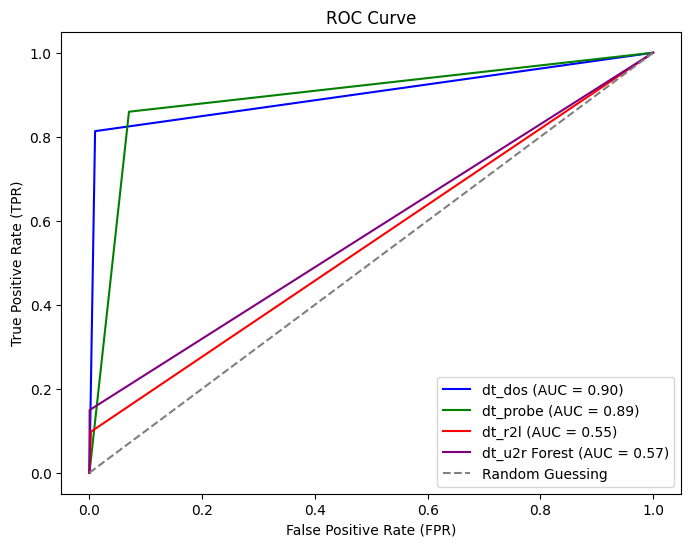

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_dos, tpr_dt_dos, label=f'dt_dos (AUC = {roc_auc_dt_dos:.2f})', color='blue')
plt.plot(fpr_dt_probe, tpr_dt_probe, label=f'dt_probe (AUC = {roc_auc_dt_probe:.2f})', color='green')
plt.plot(fpr_dt_r2l, tpr_dt_r2l, label=f'dt_r2l (AUC = {roc_auc_dt_r2l:.2f})', color='red')
plt.plot(fpr_dt_u2r, tpr_dt_u2r, label=f'dt_u2r Forest (AUC = {roc_auc_dt_u2r:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()